# Creating a logistic regression model to predict heart disease (CHD, MI)

## 1. Import modules and setting parameters

In [1]:
import pickle
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
READ_PATH = "../data/heart_2020_for_modelling.pkl"
SAVE_PATH = "../models/logistic_regression.pkl"

In [3]:
heart = pd.read_pickle(READ_PATH)

In [4]:
heart.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [5]:
y = heart["HeartDisease"]
X = heart.drop("HeartDisease", axis=1)

In [6]:
def model_eval(model, X_test, y_test):
    assert len(X_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[::, 1]
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
    plt.legend()
    plt.show()

## 2. Creating the model

### 2.1 Using the default parameters

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

D:\anaconda3\envs\heart-disease-prediction\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[58106   495]
 [ 4793   565]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     62899
           1       0.11      0.53      0.18      1060

    accuracy                           0.92     63959
   macro avg       0.55      0.73      0.57     63959
weighted avg       0.98      0.92      0.94     63959



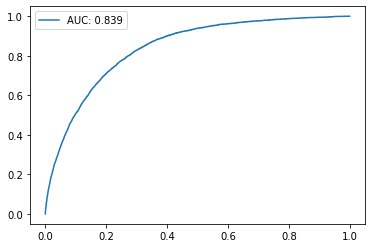

In [9]:
model_eval(log_model, X_test, y_test)

### 2.2 Using balanced weights

In [10]:
log_model_bal = LogisticRegression(max_iter=500, class_weight="balanced")
log_model_bal.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

[[43693 14908]
 [ 1171  4187]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     44864
           1       0.78      0.22      0.34     19095

    accuracy                           0.75     63959
   macro avg       0.76      0.60      0.59     63959
weighted avg       0.76      0.75      0.69     63959



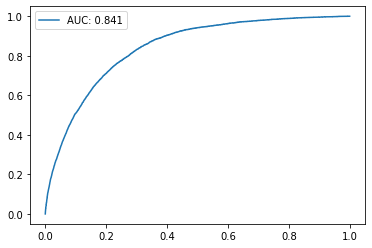

In [11]:
model_eval(log_model_bal, X_test, y_test)

### 2.3 Using the undersampling technique

In [12]:
undersample = RandomUnderSampler(sampling_strategy="majority")

In [13]:
X_over, y_over = undersample.fit_resample(X, y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=2022)

In [15]:
log_model_us = LogisticRegression(max_iter=500)
log_model_us.fit(X_train, y_train)

LogisticRegression(max_iter=500)

[[4092 1391]
 [1204 4263]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      5296
           1       0.78      0.75      0.77      5654

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950



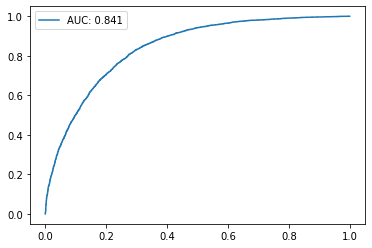

In [16]:
model_eval(log_model_us, X_test, y_test)

## 3. Results and saving the final model

In [17]:
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(log_model_us, pickle_out)